In [ ]:
## Describe the dataset and any issues with it.

## Generate a minimum of 5 unique visualizations using the data and write a brief description ofyour observations.
#Additionally, all attempts should be made to make the visualizations visually appealing

## Create a feature set and create a model which predicts interest_rate using at least 2 algorithms.

## Describe any data cleansing that must be performed and analysis when examining the data.

## Visualize the test results and propose enhancements to the model, what would you do if you had more time. 
#Also describe assumptions you made and your approach.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

loanData = pd.read_csv('loans_full_schema.csv')
loanData.shape


(10000, 55)

In [2]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
## Describe the dataset and any issues with it.

## There's so many data and features, there must be useless and relative(resemble) features which prevent we get the final goal.
##  
# 1. Is there any missing values or noise in these 'important' feature, which we want to use in data?
# 2. Which State loan more money?
# 3. How is the total loan number by month and the total loan amount?
# 4. What is the propose of loan?
# 5. What is the popular amount of person loan? 
# 6. Which grade does people usually loan? (The relationship between total loan and the grade.)
# 7. How is the real property situation of loan people? (Is that people loan for paying for their house morgage or rent?)
# 8. How is the relationship between the grade and income, delinq and credit? (I guess as the income grow, deling down, credit good, the grade high.)
# 9. What kind of people easily to get the loan? (term and income?)



<AxesSubplot:xlabel='issue_month'>

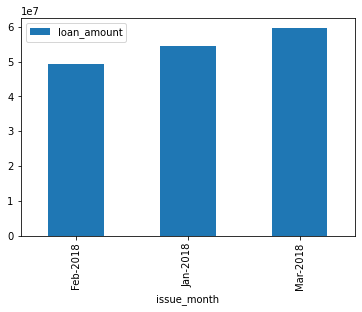

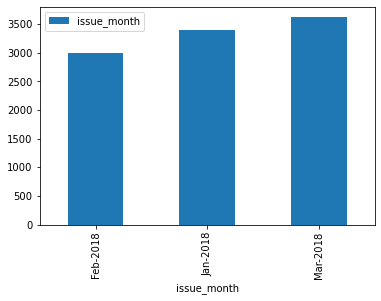

In [4]:
## Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations.
#Additionally, all attempts should be made to make the visualizations visually appealing

## My visualization will follow up the question I present

# 1.

loanData.groupby('issue_month').agg({'loan_amount':'sum'}).plot(kind= 'bar')
loanData.groupby('issue_month').agg({'issue_month':'count'}).plot(kind= 'bar')

### As the graph shows that the total amount is greatest in Mar. 2018, finally get into more than 60 million dollors
### And the issue amount tendency as same as the total loan amount, it is more than 3500 been issued at Mar.

<AxesSubplot:xlabel='loan_purpose'>

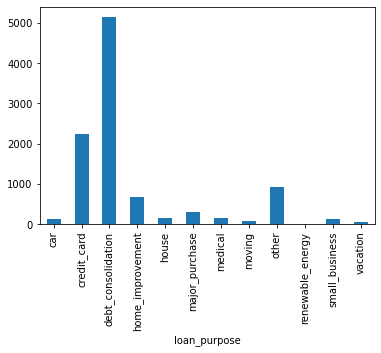

In [10]:
# 2.

loanData.groupby('loan_purpose').count().loc[:,"issue_month"].plot(kind ='bar')


### More than 5000 cases loan for their debit consolidation, and the second thing is pay their

<AxesSubplot:ylabel='issue_month'>

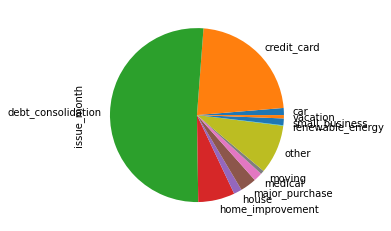

In [9]:
loanData.groupby('loan_purpose').count().loc[:,"issue_month"].plot(kind ='pie')

### Two reasons take around 75% shares for the loan propuse
### The reason for these two take such shares I think because people do not have any savings.
### So we can settle one value, when these two more than this value, we can use the company's saving money to loan people who have high 
### credit, and vice versa.

D:\Develop_trick\PythonIDE\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

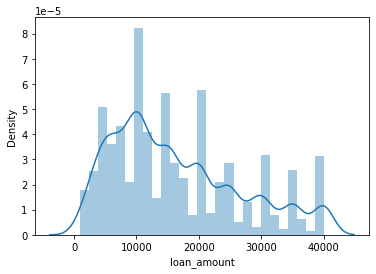

In [21]:
# 3

sns.distplot(loanData['loan_amount'])

## People usually want to loan a integer number money, like 10000, 20000, 30000...
## The 10000 dollars 

array([<AxesSubplot:ylabel='homeownership'>], dtype=object)

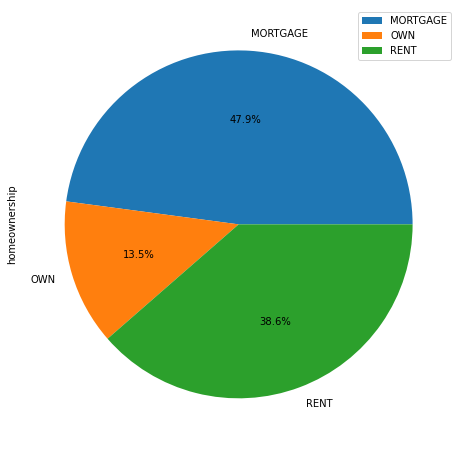

In [40]:
# 4

a = loanData.groupby('homeownership').agg({'homeownership':'count'})
a.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(8,8))


## Connected with the share of debt consolidation, we can guess, is that the people who loan money for the mortgage?

<AxesSubplot:ylabel='loan_purpose'>

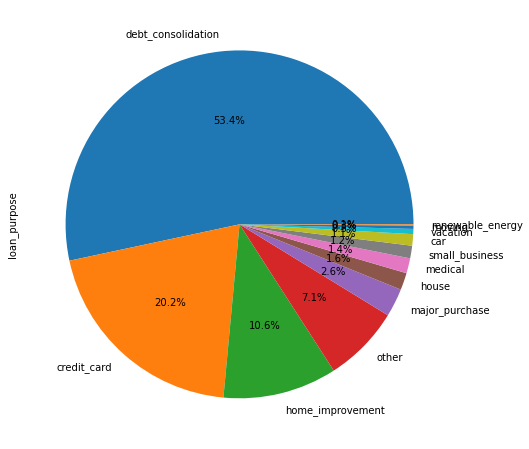

In [43]:
# 5. 
a = loanData[loanData.homeownership == 'MORTGAGE']
a.loan_purpose.value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,8))


### As the conjecture I presented, I select the mortgage people and analysis their propose,
### It turns out that there's basically no different between the pie graph #2, so the conjecture is wrong.

In [76]:
# delete the columns which loss too many values and the useless columns

lossDelete = ['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late']

uselessDelete = ['emp_title','state','application_type','sub_grade','issue_month']

loanData1 = loanData.drop(lossDelete,axis = 1)

loanData2 = loanData1.drop(uselessDelete,axis=1)

loanData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        9183 non-null   float64
 1   homeownership                     10000 non-null  object 
 2   annual_income                     10000 non-null  float64
 3   verified_income                   10000 non-null  object 
 4   debt_to_income                    9976 non-null   float64
 5   delinq_2y                         10000 non-null  int64  
 6   earliest_credit_line              10000 non-null  int64  
 7   inquiries_last_12m                10000 non-null  int64  
 8   total_credit_lines                10000 non-null  int64  
 9   open_credit_lines                 10000 non-null  int64  
 10  total_credit_limit                10000 non-null  int64  
 11  total_credit_utilized             10000 non-null  int64  
 12  num_c

In [88]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


homeownership_le = LabelEncoder()
verified_income_le = LabelEncoder()
loan_purpose_le = LabelEncoder()
grade_le = LabelEncoder()
loan_status_le = LabelEncoder()
initial_listing_status_le = LabelEncoder()
disbursement_method_le = LabelEncoder()

loanData2['homeownership'] = homeownership_le.fit_transform(loanData2['homeownership'].values)
loanData2['verified_income'] = verified_income_le.fit_transform(loanData2['verified_income'].values)
loanData2['loan_purpose'] = loan_purpose_le.fit_transform(loanData2['loan_purpose'].values)
loanData2['grade'] = grade_le.fit_transform(loanData2['grade'].values)
loanData2['loan_status'] = loan_status_le.fit_transform(loanData2['loan_status'].values)
loanData2['initial_listing_status'] = initial_listing_status_le.fit_transform(loanData2['initial_listing_status'].values)
loanData2['disbursement_method'] = disbursement_method_le.fit_transform(loanData2['disbursement_method'].values)

loanData2.head(20)### to_char() transfer


emp_length  homeownership  annual_income  verified_income  debt_to_income  \
0          3.0              0        90000.0                2           18.01   
1         10.0              2        40000.0                0            5.04   
2          3.0              2        40000.0                1           21.15   
3          1.0              2        30000.0                0           10.16   
4         10.0              2        35000.0                2           57.96   
5          NaN              1        34000.0                0            6.46   
6         10.0              0        35000.0                1           23.66   
7         10.0              0       110000.0                1           16.19   
8         10.0              0        65000.0                1           36.48   
9          3.0              2        30000.0                0           18.91   
10        10.0              0        75000.0                2           10.45   
11         2.0              0        91900.0                1            1.82   
12         5.0              0       122000.0                1           12.06   
13        10.0              0        88000.0                1            3.67   
14         NaN              0        17000.0                2           33.98   
15        10.0              0        60000.0                0           38.46   
16         NaN              0        60000.0                0           31.22   
17         3.0              2        72000.0                1           20.33   
18        10.0              0       210000.0                2            9.53   
19         1.0              0        83000.0                1           18.44   

    delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0           0                  2001                   6                  28   
1           0                  1996                   1                  30   
2           0                  2006                   4                  31   
3           0                  2007                   0                   4   
4           0                  2008                   7                  22   
5           1                  1990                   6                  32   
6           0                  2004                   1                  12   
7           1                  2005                   1                  30   
8           1                  1998                   3                  35   
9           0                  2001                   0                   9   
10          0                  1996                   4                  22   
11          0                  2000                   4                  26   
12          0                  1990                   8                  32   
13          0                  1984                   6                  65   
14          1                  2006                   0                  22   
15          0                  1995                   0                  21   
16          0                  2003                   4                  21   
17          0                  2006                   6                  12   
18          0                  2003                   2                  18   
19          3                  2005                   1                  11   

    open_credit_lines  ...  installment  grade  loan_status  \
0                  10  ...       652.53      2            1   
1                  14  ...       167.54      2            1   
2                  10  ...        71.40      3            1   
3                   4  ...       664.19      0            1   
4                  16  ...       786.87      2            1   
5                  12  ...       153.75      0            1   
6                  10  ...       553.35      2            1   
7                  15  ...       444.79      1            1   
8                  21  ...       679.58      2            1   
9           

In [103]:
imr =  SimpleImputer(missing_values=np.nan, strategy='mean')  
imr = imr.fit(loanData2)
loanData3 = imr.transform(loanData2.values)

loanData4 = pd.DataFrame(loanData3)
loanData4.info() ### End data preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

D:\Develop_trick\PythonIDE\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [147]:
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import datasets,linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures



## #34 is interest rate
res = pd.DataFrame(loanData4[34])
X = loanData4.drop(columns = 34)




In [148]:
model = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,res,test_size =0.3)
model.fit(X_train, y_train)

print('θ0：{}'.format(model.coef_))
print('θ1：{}'.format(model.intercept_))

y_pred=model.predict(X_test)

predicted = cross_val_predict(model, X_test, y_test, cv=10)


print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_pred)))

print('RMSE:{}'.format(metrics.mean_squared_error(y_test,y_pred)))


θ0：[[ 9.96568014e-04  3.25994884e-02 -1.30777641e-07  9.82689612e-02
   3.81546721e-03  3.01689601e-02  1.48878505e-03  1.48324402e-02
  -3.50920958e-03 -1.53680875e-01  9.04954416e-08  4.70193147e-07
   4.97564459e-02 -2.72223866e-02  1.94121386e-11  2.92031707e-06
  -1.60537694e-03  1.72261715e-02 -1.56578740e-03  1.56404101e-01
   1.15463195e-14  1.11022302e-14 -1.18107124e-02 -1.47744802e-06
  -3.21753495e-04 -6.98225835e-03  1.21975118e-02 -2.26837245e-02
  -6.22858980e-04 -4.62291807e-03 -2.25994685e-02  5.65920366e-03
  -2.19558979e-04  5.81248099e-02  6.01083279e-03  3.72303310e+00
   2.13107490e-01  1.90457381e-02 -1.64276013e-01  3.73703303e-06
   1.88518780e+01 -1.88518618e+01 -1.88509692e+01 -1.88592102e+01]]
θ1：[1.34192728]
MSE:1.274854821356289
RMSE:1.274854821356289


In [152]:
### quafratic 
## The hardware not support me to train more polynomial degree, I think more than 5 will be better, the quadratic term perform bad in this problem.
quadratic_featurizer = PolynomialFeatures(degree=3)
#
x_train_quadratic = quadratic_featurizer.fit_transform(X_train)
x_test_quadratic = quadratic_featurizer.transform(X_test)
#
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(x_train_quadratic, y_train)

xx_quadratic = quadratic_featurizer.transform(X_train)
print('1 r-squared:{:.2f}%'.format (model.score(X_test, y_test)*100))
print('2 r-squared:{:.2f}%'.format (regressor_quadratic.score(x_test_quadratic, y_test)*100))

1 r-squared:94.89%
2 r-squared:-22946635759475.18%


In [ ]:
# I ususlly divide the data cleaning for three parts.
# 1. Data discretization. There's tons of non-numerical data. At first, I ususally transfer it to a real number by using LabelEncoder
# 2. fully the missing value by using the SimpleImputer (meanm most frequent and common)
# 3. find the noise and replace the noise by using mean, common or most frequent.

## For differnent problem or differnt algorithm
# 1.Standardization or Mean Removal and Variance Scaling or Min/Max Scaling
# 2.Normalization
# 3.Binarization
# 4.Label binarization
# 5.Label encoding
# 6.noise (robust_scale)
# 7. Nomial Features

In [ ]:
## Linear Regression with multiple features can not be visualized. 
## The only thing I can present is the result
## if I have more time, the parameters is the main thing I need to adjust
## If I select other models like RD or DT or Xgboost, there's multiple parameters need I adjust
## For example, try more learning-rate number and select the best one. Like gamma, epsilon and alpha
## I usually put this parameters in a list, and step by step to make the result better.


### The assumpting has been list when I draw the graph.